# 1. Generate stimulus
* This notebook generates the parameters of the stimulus videos `training_video` and `simulation_video`.
* Due to the large size of video arrays, we don't actually generate the stimulus video in this notebook. The full video generation is performed in `2_simulation_V1.ipynb`. 

**Contents**
1. Becoming familiar with output file
    * This section explores the various data stored in the output of `generate_stimulus.py`
2. Visualization
    * This section provides some visualizations of the generated stimulus.
3. Stimulus checklist
    * This section checks that the generated stimulus satisfies certain basic conditions. When generating new stimulus (with different parameters), it's important to go through this checklist.
4. Compute distances
    * This distance matrix will be used to compute the persistent homology of the stimulus space.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.insert(0, '../../src/')

from stimulus_helper import *
from Gabor_filter_functions import *
import h5py
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
directory = "data"

# 1. Create example stimulus image

## 1(a) Select parameters

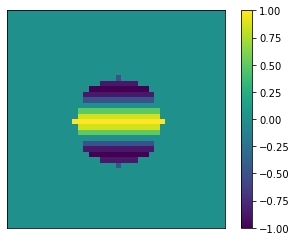

In [3]:
# Parameters
size = 40
wavelength = 12
radius = 8
n_frames = 40000
phase = math.pi
theta = 0

#plot
img, _  = create_stimulus_image(size, wavelength, phase, radius, theta, x_loc = size//2, y_loc = size//2)

plt.imshow(img)
plt.tick_params(axis='both',       
                which='both',      
                bottom=False,      
                left = False, 
                labelbottom=False,
                labelleft = False)
plt.colorbar()
plt.show()

In [47]:
#####  save stimulus parameters #####

stimulus_param = dict()
stimulus_param["wavelength"] = wavelength
stimulus_param["radius"] = radius
stimulus_param["phase"] = phase
stimulus_param["size"] = size

#with open(directory + '/stimulus_param.pickle', 'wb') as handle:
#    pickle.dump(stimulus_param, handle, protocol=pickle.HIGHEST_PROTOCOL)


## 1(b) Generate stimulus video information: orientations and locations

Note that we don't actually generate the video since that would take up a lot of space.  

Instead, we keep track of the parameters that change over the course of the video: orientations and locations.

The following will generate the stimulus video parameters (for both training and simulation sets) and save them. 

In [48]:
n_samples = 40000
size = size 
output_file = directory + "/stimulus.h5"

create_stimulus_video_parameters(size = size, n_samples = 40000, output_file= output_file)

Stimulus generation complete. Stimulus info saved to data_v3/stimulus.h5


## 1(c) Inspect stimulus

Each stimulus contains the following information.
* directions: The possible movement directions in the stimulus.
* orientations: The possible orientations in the stimulus.
* video_directions: Movement direction of each frame of stimulus video.
* video_locations: Location of the center of stimuli at each frame of video.
* video_orientations: Orientation of stimuli at each frame of video.

In [40]:
f = h5py.File(directory + '/stimulus.h5', 'r')
# load frame-level info
directions = f["train_stimulus"]["directions"][:,:]
orientations = f["train_stimulus"]["orientations"][:]
video_directions = f["train_stimulus"]["video_directions"][:,:]
video_locations = f["train_stimulus"]["video_locations"][:,:]
video_orientations = f["train_stimulus"]["video_orientations"][:]
f.close()

<b> Possible movement directions </b>

In [9]:
directions

array([[ 3,  0],
       [ 3,  3],
       [ 0,  3],
       [-3,  3],
       [-3,  0],
       [-3, -3],
       [ 0, -3],
       [ 3, -3]])

<b> Possible orientations </b>

In [10]:
orientations

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357])

<b> Movement directions of video </b>

In [11]:
video_directions

array([[-1, -1],
       [ 0,  3],
       [ 0,  3],
       ...,
       [-3,  0],
       [-3,  0],
       [-3,  3]])

<b> Location of stimulus on window</b>

In [12]:
video_locations

array([[ 0,  0],
       [ 0,  3],
       [ 0,  6],
       ...,
       [10,  9],
       [ 7,  9],
       [ 4, 12]])

<b> Orientations of stimulus </b>

In [13]:
video_orientations

array([0.        , 0.        , 0.        , ..., 0.39269908, 0.39269908,
       0.        ])

# 2. Visualize stimulus

## 2(a) Generate video

In [41]:
# create video
# Note: When simiulating spike trains, we'll need to create video for the entire stimulus.
# For now, let's create a video consisting of the first 40 frames
n_frames = 40

video = create_stimulus_video(wavelength, phase, radius, size, n_frames, video_locations, video_orientations)

Visualize the first 35 frames

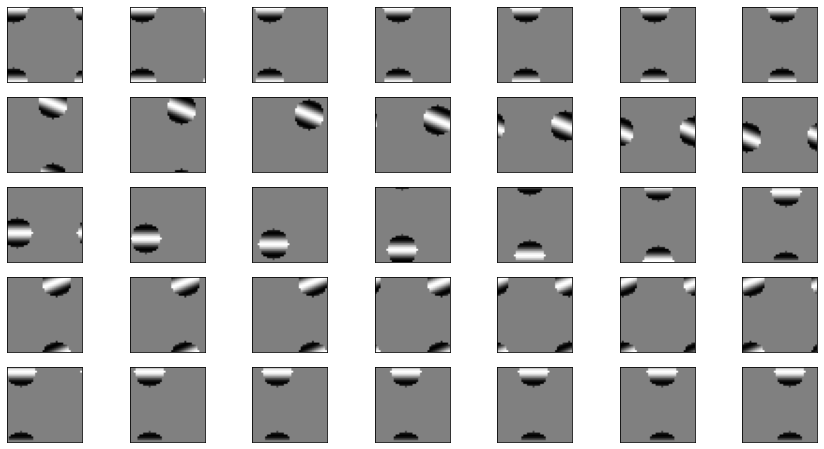

In [15]:
fig, ax = plt.subplots(nrows = 5, ncols = 7, figsize = (15,8))
for i in range(1,36):
    row = (i-1) // 7
    col = (i-1) % 7
    ax[row][col].imshow(video[:,:,i], cmap = 'gray')
    ax[row][col].tick_params(axis='both',       
                        which='both',      
                        bottom=False,      
                        left = False, 
                        labelbottom=False,
                        labelleft = False)

plt.show()

# 3. Stimulus checklist

This section contains a checklist to ensure that we generated a "good" stimulus. See the section **Stimulus checklist** in `README.md`.

## 3(a) Check that various parameters are well-represented

### 3(a)-i For each orientation, check that various locations of the window are equally represented.

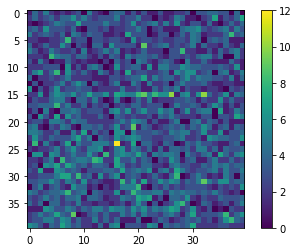

In [31]:
# Select orientation to inspect
orient = orientations[5]

# plot number of stimulus frames with given orientation and locations
loc = check_locations(video_orientations, video_locations, orient, size)

We want to make sure that the locations are well-distributed across the window.

### 3(a)-ii Check that the number of frames with specific orienentation and movement axis are similar

In [17]:
directions = [tuple(item) for item in video_directions]


Note: you have to manually input the different possible axis

In [18]:
# create possible movement axis
move_axis = [[(3,0), (-3, 0)], 
             [(0,3), (0,-3)], 
             [(3,3), (-3,-3)], 
             [(3, -3), (-3, 3)]]

Check that the output of the following cell has roughly similar numbers

In [19]:
for ori in orientations:
    for axis in move_axis:
        _ = check_directions(video_orientations, directions, ori, axis)

number of frames with orientation 0.00 and movements  [(3, 0), (-3, 0)]  : 1232
number of frames with orientation 0.00 and movements  [(0, 3), (0, -3)]  : 1344
number of frames with orientation 0.00 and movements  [(3, 3), (-3, -3)]  : 1281
number of frames with orientation 0.00 and movements  [(3, -3), (-3, 3)]  : 1121
number of frames with orientation 0.39 and movements  [(3, 0), (-3, 0)]  : 1106
number of frames with orientation 0.39 and movements  [(0, 3), (0, -3)]  : 1344
number of frames with orientation 0.39 and movements  [(3, 3), (-3, -3)]  : 1407
number of frames with orientation 0.39 and movements  [(3, -3), (-3, 3)]  : 1344
number of frames with orientation 0.79 and movements  [(3, 0), (-3, 0)]  : 1435
number of frames with orientation 0.79 and movements  [(0, 3), (0, -3)]  : 1393
number of frames with orientation 0.79 and movements  [(3, 3), (-3, -3)]  : 1232
number of frames with orientation 0.79 and movements  [(3, -3), (-3, 3)]  : 1148
number of frames with orientation 

# 4 Compute distance

Given a stimulus frame $s$, let $s_x$ denote its x-location, $s_y$ its y-location, and $s_o$ its orientation.
Given two stimulus frames $s^1$ and $s^2$, let   
* $d_x$: distance between $s^1_x$ and $s^2_x$ (on S1)  
* $d_y$: distance between $s^1_y$ and $s^2_y$ (on S1)  
* $d_o$: distance between $s^1_o$ and $s^2_o$ (on S1)  


Define $d(s^1, s^2) = \sqrt{d_x^2 + d_y^2+ d_o^2}$

In [49]:
# sample X number of stimulus frames with a given orientation. 
n_samples_per_orientation = 50
stimuli_distance, locations_sampled, orientations_sampled = compute_stimulus_angular_distance(size, 
                                                                                              orientations,
                                                                                              n_samples_per_orientation)

Perturb the entries a little bit so that each simplex has a unique associated parameter

In [50]:
m = stimuli_distance.shape[0]
print("distance matrix size: ", stimuli_distance.shape)
print("total number of entries: ", m * m)
print("total number of upper-triangular entries: ", m * (m - 1) / 2)

distance matrix size:  (400, 400)
total number of entries:  160000
total number of upper-triangular entries:  79800.0


In [51]:
# check if there are duplicate entries in the distance matrix
u, c = np.unique(stimuli_distance, return_counts=True)
dup = u[c > 1]
print("number of unique values in distance matrix: ", u.shape[0])

number of unique values in distance matrix:  2133


In [52]:
# perturb distance array
random_array = np.random.normal(loc=0.0, scale=0.001, size=(m,m))
np.max(random_array)

distance_perturbed = stimuli_distance + random_array

# check if there are duplicate entries in the distance matrix
u, c = np.unique(distance_perturbed, return_counts=True)

print("number of unique values in distance matrix: ", u.shape[0])

# put zeros on the diagonal
np.fill_diagonal(distance_perturbed, 0)
for i in range(m):
    for j in range(i,m):
        distance_perturbed[i][j] = distance_perturbed[j][i]

number of unique values in distance matrix:  160000


In [53]:
# save distance matrices

np.savetxt( directory + "/stimulus_distance.csv", stimuli_distance)
np.savetxt(directory + "/stimulus_perturbed_distance.csv", distance_perturbed)

with open(directory + '/stimulus_locations_sampled.pickle', 'wb') as handle:
    pickle.dump(locations_sampled, handle, protocol=pickle.HIGHEST_PROTOCOL)
#    
with open(directory + '/stimulus_orientations_sampled.pickle', 'wb') as handle:
    pickle.dump(orientations_sampled, handle, protocol=pickle.HIGHEST_PROTOCOL)


# 5. Create stimulus raster

In a later part of the analysis, we compute the distances between stimulus images and the simulated V1 spike trains. For that purpose, we need to create a binary raster of the stimulus images. 

In [ ]:
# load stimulus video information
f = h5py.File(directory + '/stimulus.h5', 'r')
video_locations = f["simulation_stimulus"]["video_locations"][:,:]
video_orientations = f["simulation_stimulus"]["video_orientations"][:]
f.close()

# load the stimulus samples information
with open(directory + '/stimulus_locations_sampled.pickle', 'rb') as handle:
    locations_sampled = pickle.load(handle)
    
with open(directory + '/stimulus_orientations_sampled.pickle', 'rb') as handle:
    orientations_sampled = pickle.load(handle)


In [ ]:
### CAUTION!!!! ####
### NEED TO TURN THE FOLLOWING INTO THE FUNCTION "create_sampled_stimulus_raster"

# get binary matrix indicating whether the sampled stimulus matches a video frame
stimulus_matrix = np.zeros((400, 40000))
for i in range(400):

    sampled_loc = locations_sampled[i]
    sampled_orientation = orientations_sampled[i]

    # find all frames that match the sampled orientation
    orientation_match = [idx for idx, ori in enumerate(video_orientations) if ori == sampled_orientation]
    
    # "allow locations to be an approximate match " (I'm not allowing locations to match via the corners.... )
    match = [j for j in orientation_match if location_distance_on_torus(video_locations[j], sampled_loc, 40) <= 6]
    for idx in match:
        stimulus_matrix[i, idx] = 1

In [ ]:
# Compute stimulus raster
stimulus_raster = create_sampled_stimulus_raster(locations_sampled, 
                                                 orientations_sampled, 
                                                 video_locations, 
                                                 video_orientations, 
                                                 max_proximity = 6, 
                                                 image_size = 40)

# increase timebins (25 timebins per second)
n_bins = 25
stimulus_raster = np.repeat(stimulus_raster, n_bins, axis = 1)
print(stimulus_raster.shape)

In [ ]:
# save the stimulus raster
hf = h5py.File(directory + '/stimulus_raster.h5','w')
hf.create_dataset('raster', data = stimulus_raster)
hf.close()